### Import libraries

In [40]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Load MNIST dataset
This dataset is formed by images of digits with a resolution of 28x28 pixels and greyscale

In [51]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target

In [52]:
print("X shape : {}\ny format: {}".format(X.shape, y.shape))

X shape : (70000, 784)
y format: (70000,)


Example of random MNIST data


<Figure size 432x288 with 0 Axes>

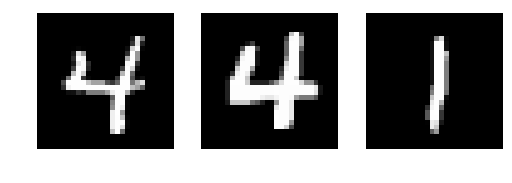

In [53]:
# Visualize random MNIST data
n = 3
plt.gray()
plt.figure(dpi=100)
print("Example of random MNIST data")
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(np.reshape(random.choice(X), (28,28)))
    plt.axis("off")
plt.show()

In [44]:
# Convert X and y into dataframes

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [54]:
# Shuffle data 

np.random.seed(16)
rndperm = np.random.permutation(df.shape[0])

In [56]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


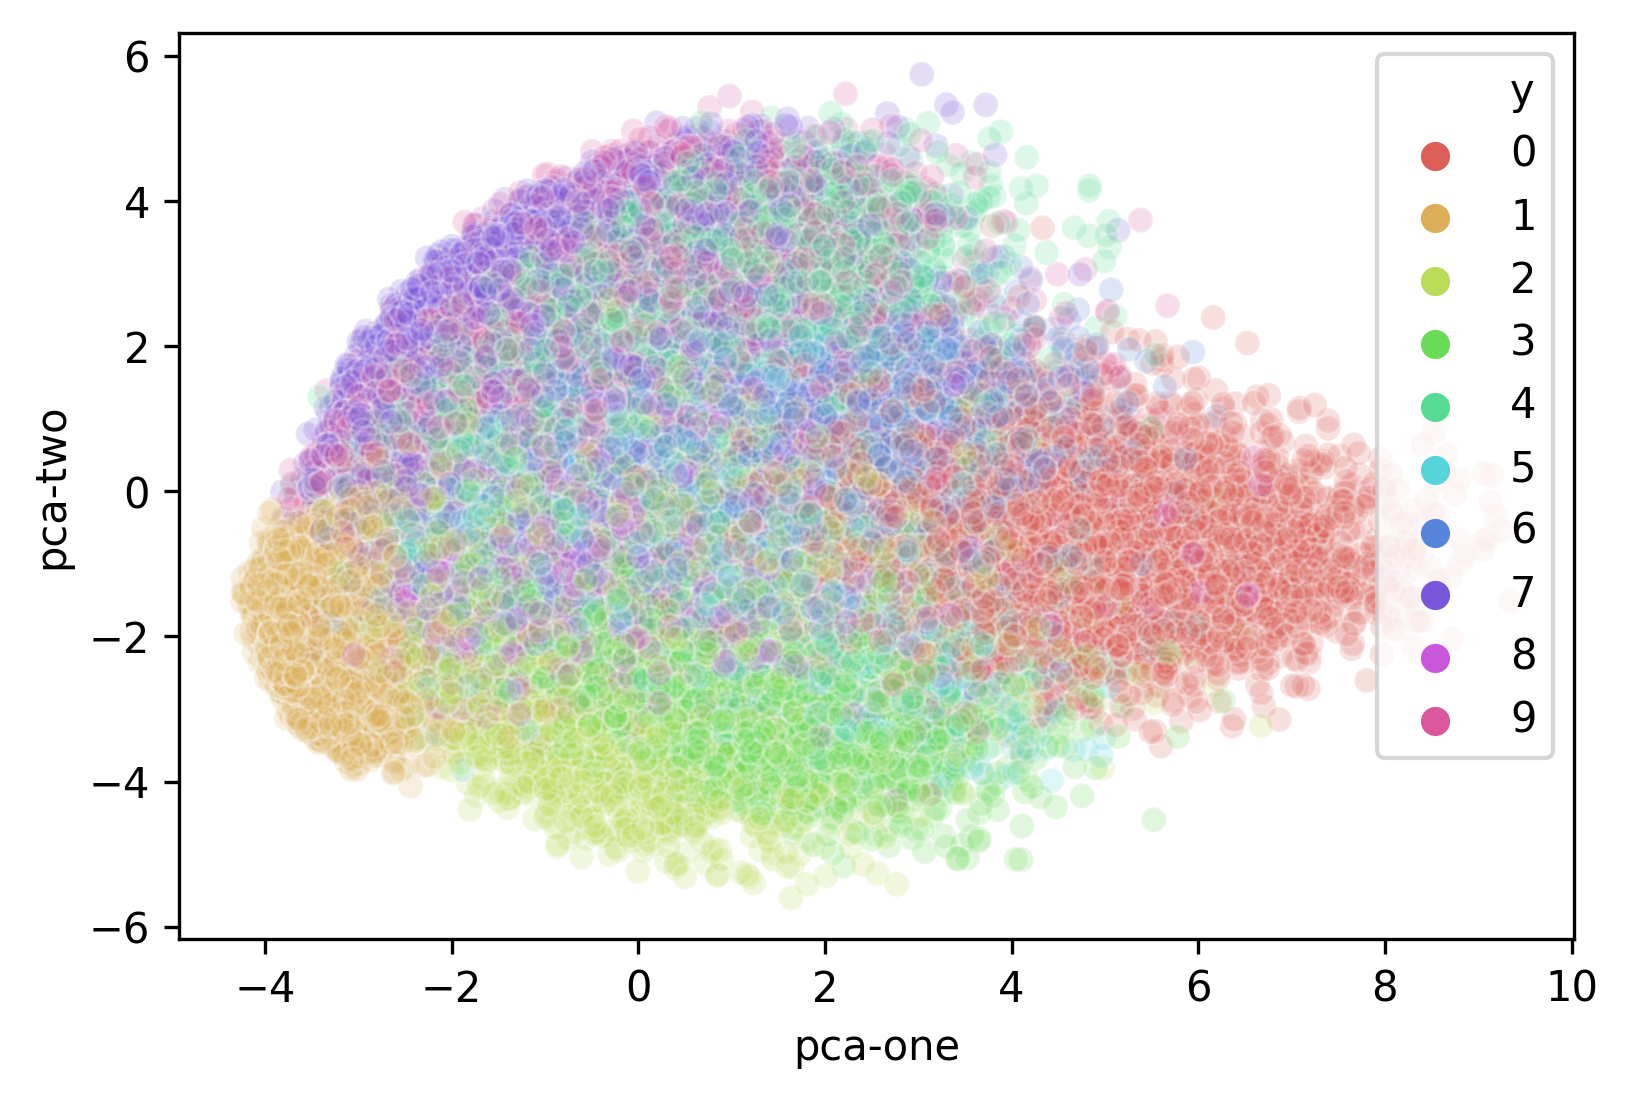

In [70]:
plt.figure(dpi=300)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.2
)